In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [101]:
df = pd.read_csv("../Section 32 - Upper Confidence Bound (UCB)/Ads_CTR_Optimisation.csv")
'''Dataset for the simulation : click on Ads
    rows represent different unique users (10,000 users)
    cols represent ads type (10 unique ads)
- select the ads with the most clicks'''
df.shape, df.head()

((10000, 10),    Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
 0     1     0     0     0     1     0     0     0     1      0
 1     0     0     0     0     0     0     0     0     1      0
 2     0     0     0     0     0     0     0     0     0      0
 3     0     1     0     0     0     0     0     1     0      0
 4     0     0     0     0     0     0     0     0     0      0)

In [102]:
num_of_rows = df.shape[0]
num_of_cols = df.shape[1]

In [103]:
#implement UCB
ads_selected = []
numbers_of_selection = np.zeros(num_of_cols,dtype=int)
sums_of_rewards = np.zeros(num_of_cols, dtype=int)
total_rewards = 0
numbers_of_selection, sums_of_rewards, total_rewards

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 0)

In [104]:
for n in range(0, num_of_rows) :
    ad = 0
    max_upper_bound = 0
    for i in range(0, num_of_cols) :
        if numbers_of_selection[i] > 0 :
            average_reward = sums_of_rewards[i] / numbers_of_selection[i]
            delta_i = math.sqrt( (3/2) * math.log(n + 1) / numbers_of_selection[i])
            upper_bound = average_reward + delta_i
        else :
            upper_bound = 1e400
        if upper_bound > max_upper_bound :
            max_upper_bound = upper_bound
            #specific ad
            ad = i
    
    ads_selected.append(ad)
    numbers_of_selection[ad] += 1
    
    reward = df.values[n, ad]
    sums_of_rewards[ad] += reward
    
    total_rewards += reward

In [105]:
total_rewards, numbers_of_selection, sums_of_rewards

(2178,
 array([ 705,  387,  186,  345, 6323,  150,  292, 1170,  256,  186]),
 array([ 120,   47,    7,   38, 1675,    1,   27,  236,   20,    7]))

In [106]:
ads_selected[1:10], ads_selected[-10:]

([1, 2, 3, 4, 5, 6, 7, 8, 9], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

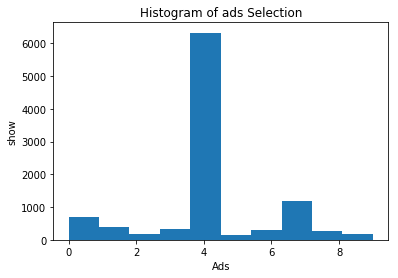

In [107]:
plt.hist(ads_selected)
plt.title('Histogram of ads Selection')
plt.xlabel('Ads')
plt.ylabel('show')
plt.show()